In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import os
import glob
from datetime import date

## Read input

## Calculate corr

In [4]:
# define samples names
col_names = bgi.columns[1:]
samples = [name[4:] for name in col_names]

nm = 'bgi_'+str(samples[1])
nm

'bgi_VO0KDF'

In [15]:
# define samples names
col_names = bgi.columns[1:]
samples = [name[4:] for name in col_names]

# new df with columns: name, bgi_sample_number, ill_sample_nember, correlation
df = pd.DataFrame(columns=['name', 'bgi_sample_number', 'ill_sample_number', 
                           'abud_corr','common_genus','only_bgi_genus','only_ill_genus'])

for smpl in samples:

    # if smpl present in both datasets
    col_name1 = 'ill_' + str(smpl)
    if col_name1 in ill.columns:

        col_name2 = 'bgi_' + str(smpl)
        if col_name2 in bgi.columns:
            
            #print(smpl)
            #read info about sample
            smplB = bgi[['name', 'bgi_' + str(smpl)]].dropna()
            smplB = smplB[smplB['bgi_' + str(smpl)] > 0]  
            smplI = ill[['name','ill_' + str(smpl)]].dropna()
            smplI = smplI[smplI['ill_' + str(smpl)] > 0]

            mrg = pd.merge(smplB, smplI, on='name', how='outer')
            #print(mrg['bgi_' + str(smpl)].corr(mrg['ill_' + str(smpl)]))
            #print('BGI nmb:' + str(len(smplB)) + ' Illumina nmb:' + str(len(smplI)))
            common_values = len(list(set(smplB['name']).intersection(set(smplI['name']))))
            only_bgi_sp = len(smplB.loc[~smplB['name'].isin(smplI['name'])])
            only_ill_sp = len(smplI.loc[~smplI['name'].isin(smplB['name'])])

            # assign values to df
            df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI), 
                            'abud_corr': mrg['bgi_' + str(smpl)].corr(mrg['ill_' + str(smpl)]),
                            'common_genus': common_values,'only_bgi_genus': only_bgi_sp,'only_ill_genus': only_ill_sp}, 
                            ignore_index=True)

df = df.sort_values(by=['common_genus'], ascending=False)
df.to_excel('results/Genus_part_result_table.xlsx', index=False)
df.head()

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_52386/627388731.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI),
/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_52386/627388731.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI),
/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_52386/627388731.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI),
/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_52

,name,bgi_sample_number,ill_sample_number,abud_corr,common_genus,only_bgi_genus,only_ill_genus
297,V4PAWM,20,20,0.995151,20,0,0
137,V46GGV,20,20,0.998425,20,0,0
617,VHOSFY,20,19,0.993755,19,1,0
493,V2MRMT,17,19,0.928112,17,0,2
590,VFBW1M,17,18,0.998081,17,0,1


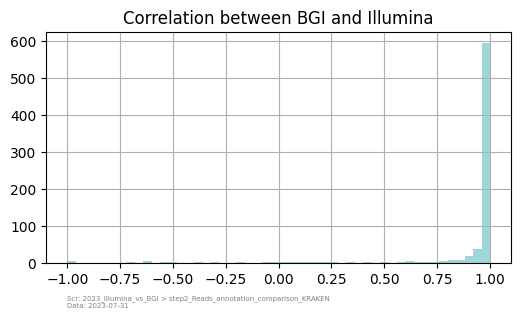

In [16]:
df['abud_corr'].hist(bins=50, figsize=(6,3), color='#75c7c9', alpha=0.7)
plt.title('Correlation between BGI and Illumina')

plt.text(-1,-100, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(-1,-120, 'Data: '+str(date.today()), color='grey', fontsize=5)

plt.savefig('results/Genus_part_correlation_hist.png', dpi=300, bbox_inches='tight')

In [8]:
sum((df['bgi_sample_number'] > df['ill_sample_number']))
sum((df['ill_sample_number'] > df['bgi_sample_number']))


246

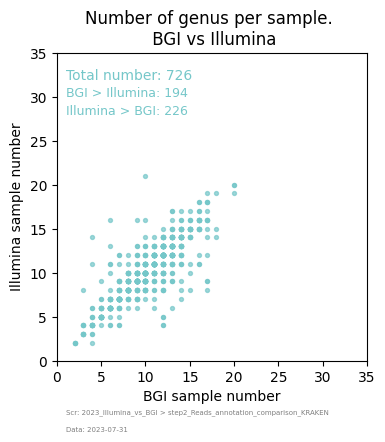

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(df['bgi_sample_number'], df['ill_sample_number'], color='#75c7c9', alpha=0.7, s=8)
plt.xlabel('BGI sample number')
plt.ylabel('Illumina sample number')
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.title('Number of genus per sample. \n BGI vs Illumina')
plt.text(1,32, 'Total number: '+str(len(df)), color='#75c7c9')
plt.text(1,30, 'BGI > Illumina: '+str(sum((df['bgi_sample_number'] > df['ill_sample_number']))), fontsize=9, color='#75c7c9')
plt.text(1,28, 'Illumina > BGI: '+str(sum((df['ill_sample_number'] > df['bgi_sample_number']))), fontsize=9, color='#75c7c9')

plt.text(1,-6, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(1,-8, 'Data: '+str(date.today()), color='grey', fontsize=5)

plt.savefig('results/Genus_part_Number_of_species_per_sample_BGI_vs_Illumina.png', dpi=300, bbox_inches='tight')

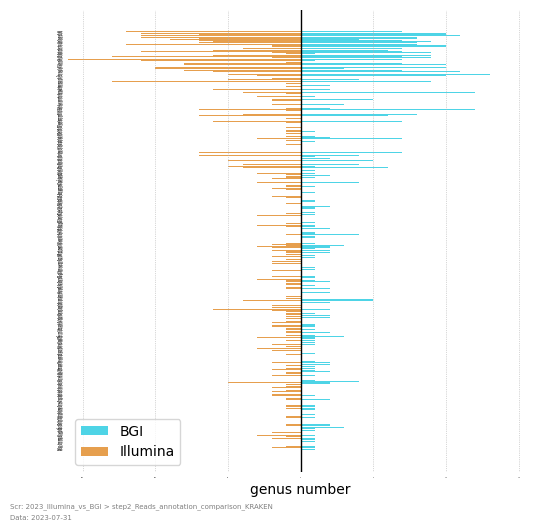

In [19]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Plot the positive values as blue bars
plt.barh(df['name'], df['only_bgi_genus'], color='#4ed4e6', label='BGI')
plt.barh(df['name'], df['only_ill_genus']*-1, color='#e69f4e', label='Illumina')

# Set the x-axis limit to accommodate both positive and negative values
plt.xlim(-max(max(df['only_bgi_genus']), abs(min(df['only_ill_genus']))) - 2,
         max(max(df['only_bgi_genus']), abs(min(df['only_ill_genus']))) + 2)

# Add a vertical line at 0 to separate positive and negative values
plt.axvline(x=0, color='black', linewidth=1)

# Add labels and a title
plt.xlabel('genus number')
#plt.title('Bidirectional Bar Chart')
plt.legend()
plt.tick_params(axis='both', which='both', length=0, labelsize=0)
plt.box(False)
plt.grid(axis='x', linestyle='dotted', linewidth=0.5)

plt.text(-20,-100, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(-20,-120, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch1.png')
plt.savefig('results/Genus_bar_ch1.svg')


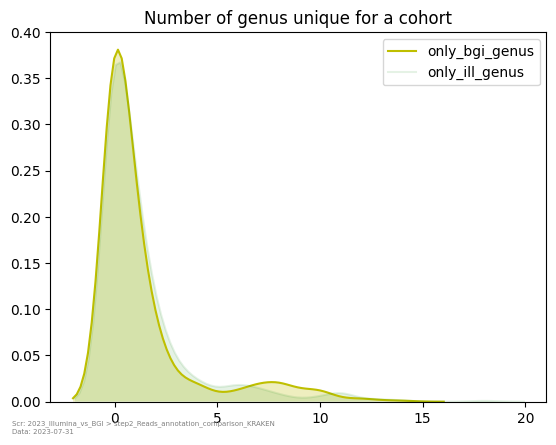

In [20]:
sns.kdeplot(df['only_bgi_genus'], shade=True, color='y')
sns.kdeplot(df['only_ill_genus'], shade=True, color='g', alpha=0.1)

plt.title('Number of genus unique for a cohort')

plt.text(-5,-0.025, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(-5,-0.035, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch2.png')
plt.savefig('results/Genus_bar_ch2.svg')

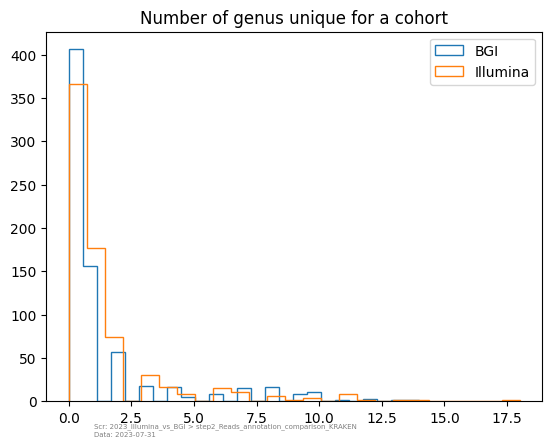

In [21]:
plt.hist(df['only_bgi_genus'], bins=25, histtype='step', stacked=True, fill=False, label='BGI')
plt.hist(df['only_ill_genus'], bins=25, histtype='step', stacked=True, fill=False, label='Illumina')
plt.legend()

plt.title('Number of genus unique for a cohort')

plt.text(1,-30, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(1,-40, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch3.png')
plt.savefig('results/Genus_bar_ch3.svg')